In [1]:

from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import statsmodels.formula.api as smf

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

import xgboost
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt, matplotlib.image as mpimg


In [2]:
EvyatarSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Evyatar636771052727603804Spontan.csv")
EvyatarSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Evyatar636771053639929594Sync.csv")
EvyatarAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Evyatar636771054555711409Alone.csv")

NofarSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Nofar636759795182793299Spontan.csv")
NofarSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Nofar636759797397919664Sync.csv")
NofarAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Nofar636759796290435160Alone.csv")

OriyaSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Oriya636759804404113837Spontan.csv")
OriyaSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Oriya636759806131350399Sync.csv")
OriyaAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Oriya636759805268396661Alone.csv")

OryaSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\OryaB636771083605535985Spontan.csv")
OryaSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\OryaB636771084494502229Sync.csv")
OryaAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\OryaB636771082736601528Alone.csv")

RevitalSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Revital636770957038873193Spontan.csv")
RevitalSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Revital636770957894370062Sync.csv")
RevitalAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Revital636770955999435879Alone.csv")

ShaharSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Sachar636771045591258071Spontan.csv")
ShaharSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Sachar636771046527112972Sync.csv")
ShaharAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Sachar636771047408504303Alone.csv")

ShellySpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Shelly636759787508979097Spontan.csv")
ShellySync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Shelly636759789526313406Sync.csv")
ShellyAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Shelly636759788383205274Alone.csv")
                        

YaelSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yael636771059544754823Spontan.csv")
YaelSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yael636771060699529085Sync.csv")
YaelAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yael636771061659067649Alone.csv")

YoelSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yoel636760921663075813Spontan.csv")
YoelSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yoel636760923490742912Sync.csv")
YoelAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\Yoel636760922573364655Alone.csv")

RightHand=pd.read_csv(r"C:\Users\idank\CourseProject\hands\Training\HandRight.csv")

In [3]:
ItielSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Itiel636770940701219076Spontan.csv")
ItielSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Itiel636770941638547912Sync.csv")
ItielAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Itiel636770942529041679Alone.csv")

MorSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Mor636771064635567065Spontan.csv")
MorSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Mor636771065531910215Sync.csv")
MorAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Mor636771066407626524Alone.csv")

OdedSpontan = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Oded636754670490266956Spontan.csv")
OdedSync = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Oded636754671560850581Sync.csv")
OdedAlone = pd.read_csv(r"C:\Users\idank\CourseProject\hands\Validation\Oded636754669540564461Alone.csv")

In [4]:
AloneTrain={'1':EvyatarAlone,'2':NofarAlone,'3':OriyaAlone,'4':OryaAlone,'5':RevitalAlone,'6':ShaharAlone,'7':ShellyAlone,'8':YaelAlone,'9':YoelAlone}
SpontanTrain={'1':EvyatarSpontan,'2':NofarSpontan,'3':OriyaSpontan,'4':OryaSpontan,'5':RevitalSpontan,'6':ShaharSpontan,'7':ShellySpontan,'8':YaelSpontan,'9':YoelSpontan}
SyncTrain={'1':EvyatarSync,'2':NofarSync,'3':OriyaSync,'4':OryaSync,'5':RevitalSync,'6':ShaharSync,'7':ShellySync,'8':YaelSync,'9':YoelSync}
AloneTest={'1':MorAlone,'2':OdedAlone,'3':ItielAlone}
SpontanTest={'1':MorSpontan,'2':OdedSpontan,'3':ItielSpontan}
SyncTest={'1':MorSync,'2':OdedSync,'3':ItielSync}

AllData={'1':AloneTrain,'2':SpontanTrain,'3':SyncTrain,'4':AloneTest,'5':SpontanTest,'6':SyncTest}

In [5]:
YoelSpontan

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,598.6176,45189,right,2,213.08350,266.1829,53.539560,35.149220,-131.815000,-14.883920,...,-0.727216,263.0509,228.0114,91.119530,437.0172,37.319870,127.90990,0.633264,1.826475,0.0
1,598.6176,45189,left,2,-118.32730,222.0102,-5.771582,2.307308,-1.782913,0.003759,...,1.154596,-170.4943,171.8102,7.225864,-362.7986,8.080679,71.97699,0.000000,0.024658,0.0
2,598.6508,45192,right,2,212.78640,259.6201,54.135350,-49.467030,-216.358500,17.786080,...,-0.717699,266.1888,231.6069,95.535340,461.0690,63.297530,136.45770,0.617089,1.800272,0.0
3,598.6508,45192,left,2,-118.35640,222.0678,-5.761682,-5.225802,6.871186,1.059343,...,1.156606,-170.5728,171.9170,7.198559,-362.8716,8.572792,72.93172,0.000000,0.025593,0.0
4,598.6838,45194,right,2,209.52130,253.1059,54.677880,-119.643100,-232.025500,20.305070,...,-0.720374,264.8197,231.9514,97.535800,473.9604,82.186740,140.10040,0.630914,1.724456,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,673.4894,52512,left,2,-81.66566,203.9826,24.040280,240.809500,-160.562000,-222.444200,...,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.385710,89.68940,0.000000,1.299514,0.0
4371,673.5233,52516,right,2,158.51870,172.6876,-29.329130,62.951450,93.993060,-63.022420,...,-0.452287,200.4651,148.9561,25.427530,400.5782,31.011080,139.27960,0.000000,0.448368,0.0
4372,673.5233,52516,left,2,-77.57621,198.9182,20.579730,127.002900,-218.657100,-80.403090,...,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.070000,90.44517,0.000000,0.542512,0.0
4373,673.5560,52519,right,2,159.35720,175.7603,-30.162820,10.300270,118.676600,-7.947631,...,-0.432002,199.5587,149.5821,24.801710,390.8217,24.226540,145.63370,0.000000,0.513919,0.0


# Data Preprocessing:

In [6]:
# remove first 7 sec:

def remove_7_sec(df):
    df.drop(df[df.Time<(df.Time[0]+7)].index, inplace=True)
    return df

for dictionary in AllData.values():
    for set in dictionary.values():
        set = remove_7_sec(set)


In [7]:
# look at the time starting
YoelSpontan

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
422,605.6465,45853,right,2,129.36550,187.0992,135.53780,41.741050,128.088600,49.132630,...,-1.686098,186.8218,143.8879,123.83070,400.3621,-1.855606,127.38530,0.0,0.013249,0.0
423,605.6465,45853,left,2,-78.74075,180.2421,24.23667,102.459200,-198.566100,-74.722430,...,0.963664,-128.6434,133.1411,48.90355,-292.8215,-35.967250,155.21050,0.0,0.000000,0.0
424,605.6797,45856,right,2,131.31820,192.6864,137.28280,42.179810,181.624100,33.076820,...,-1.605424,187.5936,147.1912,128.61460,393.3826,-9.201757,127.66200,0.0,0.050798,0.0
425,605.6797,45856,left,2,-77.70930,178.5021,23.36562,2.498203,7.781074,-13.015540,...,0.958639,-126.4426,130.2389,47.94522,-288.9359,-32.413310,166.05090,0.0,0.000000,0.0
426,605.7134,45859,right,2,133.57310,196.0686,136.94050,75.888450,60.379170,-47.221610,...,-1.537501,188.7512,148.7629,130.58350,391.8213,-10.781400,119.76880,0.0,0.220657,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,673.4894,52512,left,2,-81.66566,203.9826,24.04028,240.809500,-160.562000,-222.444200,...,0.845894,-121.2401,146.1889,44.91408,-263.3239,-65.385710,89.68940,0.0,1.299514,0.0
4371,673.5233,52516,right,2,158.51870,172.6876,-29.32913,62.951450,93.993060,-63.022420,...,-0.452287,200.4651,148.9561,25.42753,400.5782,31.011080,139.27960,0.0,0.448368,0.0
4372,673.5233,52516,left,2,-77.57621,198.9182,20.57973,127.002900,-218.657100,-80.403090,...,0.827028,-120.1531,144.5244,44.43902,-276.8819,-56.070000,90.44517,0.0,0.542512,0.0
4373,673.5560,52519,right,2,159.35720,175.7603,-30.16282,10.300270,118.676600,-7.947631,...,-0.432002,199.5587,149.5821,24.80171,390.8217,24.226540,145.63370,0.0,0.513919,0.0


In [8]:
for dictionary in AllData.values():
    for set in dictionary.values():
        if (set.isna().sum().sum() != 0):
            print(set)

# there is no nuall at all!

In [9]:
# search for duplicates:

for dictionary in AllData.values():
    for set in dictionary.values():
        if ( len(set[set.duplicated()]) != 0):
            print(set[set.duplicated()])
            set.drop_duplicated()

In [10]:
# the alone sets have problem:
# suppose to be only "left" hand but sometimes "right" here to!

#for exampe:
RevitalAlone.head(10)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
632,464.7928,54268,left,2,-40.91462,258.7136,59.085560,112.56390,-319.88060,-24.737300,...,0.560029,-62.73220,196.6212,72.35135,-217.5358,33.71065,152.7422,0.0,0.214086,0.000000
633,464.7928,54268,right,2,829.37290,782.3510,4.353536,22.39479,19.12687,-14.793300,...,1.260740,771.17600,753.5453,18.45340,643.4308,597.51930,146.1393,0.0,0.833592,0.206237
634,464.8091,54270,left,2,-38.65692,252.1669,58.448360,128.58670,-407.39460,-46.032300,...,0.516865,-59.28488,189.5574,70.78001,-217.3255,30.24627,152.0808,0.0,0.121998,0.000000
635,464.8091,54270,right,2,830.06470,783.1213,4.141901,48.30498,33.67981,3.146520,...,1.308613,772.14080,752.9295,15.78921,643.2523,603.35850,149.8896,0.0,0.794026,0.000000
636,464.8255,54272,left,2,-36.67935,245.3734,57.771190,109.65200,-377.65790,-22.530600,...,0.439065,-55.76262,182.2031,69.07118,-218.0123,28.44524,152.7387,0.0,0.094257,0.000000
637,464.8255,54272,right,2,831.02180,784.4048,3.832320,50.46230,75.21567,-47.691200,...,1.333779,772.95460,753.6547,13.86563,628.2984,616.57350,145.2050,0.0,0.841261,0.000000
638,464.8420,54273,left,2,-35.70242,242.3722,57.693150,112.09730,-344.37360,-8.954340,...,0.413617,-54.32062,179.0320,68.49400,-218.6815,28.25070,153.4478,0.0,0.097651,0.000000
639,464.8420,54273,right,2,831.20360,785.3401,3.912797,20.86650,107.31360,9.234321,...,1.327772,774.28380,752.4078,13.94190,628.9371,615.86600,145.0806,0.0,0.978542,0.000000
640,464.8586,54275,left,2,-34.08131,236.3266,58.059610,79.40815,-306.74160,36.393750,...,0.378524,-51.91923,172.6836,67.46574,-220.6052,29.23134,156.5340,0.0,0.118523,0.000000
641,464.8586,54275,right,2,832.06650,786.9327,4.766444,53.73274,51.38328,51.999180,...,1.321224,776.76230,751.5183,14.92903,645.9955,601.77740,147.0063,0.0,0.980772,0.000000


In [11]:
# change the correct hand in the ALONE sets:

# most of the students remove all the "right" but this is incorrect. you can see it by the time, number of hands, Frame Id and more.

# this function check if the "right" is a duplicate of "left" (and remove it)
# or it is a mistake in the data (by change time). the mistake can happened by
# the location of the hand.

def correct_alone(df):
    for i in df[df[' Hand Type'] == 'right'].index:
        #diff = (df.loc[i].Time - df.loc[i-1].Time)
        if(df.loc[i][' # hands'] == 2):
            df.drop(index=i, inplace=True)
        else:
            df[' Hand Type'][i]='left'
            
for set in AloneTest.values():
    correct_alone(set)
    set.reset_index(inplace=True)
for set in AloneTrain.values():
    correct_alone(set)
    set.reset_index(inplace=True)

<ipython-input-11-e299df6da967>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Hand Type'][i]='left'


In [12]:
#check for "rights":

for set in AloneTest.values():
    print(set[' Hand Type'].value_counts())
for set in AloneTrain.values():
     print(set[' Hand Type'].value_counts())

        # only "left"!

left    4103
Name:  Hand Type, dtype: int64
left    2039
Name:  Hand Type, dtype: int64
left    4050
Name:  Hand Type, dtype: int64
left    4103
Name:  Hand Type, dtype: int64
left    4104
Name:  Hand Type, dtype: int64
left    4059
Name:  Hand Type, dtype: int64
left    4104
Name:  Hand Type, dtype: int64
left    4103
Name:  Hand Type, dtype: int64
left    4103
Name:  Hand Type, dtype: int64
left    4045
Name:  Hand Type, dtype: int64
left    4078
Name:  Hand Type, dtype: int64
left    2040
Name:  Hand Type, dtype: int64


In [13]:
# drop the previous index column:

for set in AloneTest.values():
    set.drop(['index'], axis=1, inplace=True)
for set in AloneTrain.values():
     set.drop(['index'], axis=1, inplace=True)
        
#for example:
RevitalAlone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,464.7928,54268,left,2,-40.91462,258.7136,59.085560,112.56390,-319.88060,-24.737300,...,0.560029,-62.73220,196.6212,72.35135,-217.5358,33.71065,152.7422,0.0,0.214086,0.0
1,464.8091,54270,left,2,-38.65692,252.1669,58.448360,128.58670,-407.39460,-46.032300,...,0.516865,-59.28488,189.5574,70.78001,-217.3255,30.24627,152.0808,0.0,0.121998,0.0
2,464.8255,54272,left,2,-36.67935,245.3734,57.771190,109.65200,-377.65790,-22.530600,...,0.439065,-55.76262,182.2031,69.07118,-218.0123,28.44524,152.7387,0.0,0.094257,0.0
3,464.8420,54273,left,2,-35.70242,242.3722,57.693150,112.09730,-344.37360,-8.954340,...,0.413617,-54.32062,179.0320,68.49400,-218.6815,28.25070,153.4478,0.0,0.097651,0.0
4,464.8586,54275,left,2,-34.08131,236.3266,58.059610,79.40815,-306.74160,36.393750,...,0.378524,-51.91923,172.6836,67.46574,-220.6052,29.23134,156.5340,0.0,0.118523,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,532.6867,62086,left,1,-17.56182,264.1838,-5.365704,59.03207,172.06260,7.313492,...,0.885744,-61.92199,228.3195,20.69795,-238.3220,130.19420,113.1047,0.0,0.000000,0.0
4099,532.7032,62088,left,1,-16.53716,266.0872,-5.672907,50.21147,117.23160,-24.331430,...,0.880207,-62.29589,233.0484,21.69718,-241.2778,139.68290,114.0707,0.0,0.000000,0.0
4100,532.7196,62090,left,1,-15.96658,268.0577,-6.206815,20.26236,131.76040,-37.844470,...,0.859292,-63.22384,239.5353,23.60675,-244.9782,150.28260,114.6222,0.0,0.000000,0.0
4101,532.7363,62091,left,1,-16.30747,268.9182,-6.393378,-38.83522,98.03497,-21.253510,...,0.841384,-64.19014,243.3621,25.05020,-247.3136,155.29070,114.4580,0.0,0.000000,0.0


In [14]:
# the same with the "RightHand":

RightHand[' Hand Type'].value_counts()

right    4738
left       74
Name:  Hand Type, dtype: int64

In [15]:
# fix it:

for i in RightHand[RightHand[' Hand Type'] == 'left'].index:
    if(RightHand.loc[i][' # hands'] == 2):
        RightHand.drop(index=i, inplace=True)
    else:
        RightHand[' Hand Type'][i]='right'
        
RightHand.reset_index(inplace=True)
RightHand.drop(['index'], axis=1, inplace=True)

<ipython-input-15-1bfcf170123d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RightHand[' Hand Type'][i]='right'


In [16]:
# the same with the "RightHand":

RightHand[' Hand Type'].value_counts()

right    4772
Name:  Hand Type, dtype: int64

# important!
### the feature "# Hands" can't stay in the data because it  discovers the labels. Most of the students did not notice it at all, which is why they got really good results. I delete the feature because it is not correct to remain it and announce that it is clear that the final score will probably not be as high as that of those who remain this feature!
- The feature reveals if there is one or two hands - that is, whether it is alone or one of the other two (reveals a third of the labels in advance!)

In [17]:
SpontanTrain['1'].keys()

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [18]:
# remove ""# hands"

for dictionary in AllData.values():
    for set in dictionary.values():
        set.drop(columns=[' # hands'], inplace=True)

#for set in Test_data.values():
 #   set.drop(columns=[' # hands'], inplace=True)

RightHand.drop(columns=[' # hands'], inplace=True)

In [19]:
SpontanTrain['1'].keys()

Index(['Time', ' Frame ID', ' Hand Type', ' Position X', ' Position Y',
       ' Position Z', ' Velocity X', ' Velocity Y', ' Velocity Z', ' Pitch',
       ' Roll', ' Yaw', ' Wrist Pos X', ' Wrist Pos Y', ' Wrist Pos Z',
       ' Elbow pos X', ' Elbow Pos Y', ' Elbow Pos Z', ' Grab Strenth',
       ' Grab Angle', ' Pinch Strength'],
      dtype='object')

# let's put together in one row both left and right:

In [20]:
# in spontanious and sync datas there are rows without a match or too much matches:

#suppose to be 2, like here:
OryaSpontan.groupby([' Frame ID']).count()

,Time,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Frame ID,,,,,,,,,,,,,,,,,,,,
44671,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44673,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44675,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44678,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52478,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
52480,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
52482,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [21]:
# but in some cases:

OryaSpontan.groupby([' Frame ID']).count()[(OryaSpontan.groupby([' Frame ID']).count()['Time'] != 2)]

,Time,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Frame ID,,,,,,,,,,,,,,,,,,,,
44897,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44901,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44903,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44905,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50492,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50542,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [22]:
# so, let's remove those cases:

for set in SpontanTrain.values():
    for i in ((set.groupby([' Frame ID']).count()['Time'] != 2)[(set.groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        set.drop(set[set[' Frame ID']==i].index, inplace=True)
for set in SyncTrain.values():
     for i in ((set.groupby([' Frame ID']).count()['Time'] != 2)[(set.groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        set.drop(set[set[' Frame ID']==i].index, inplace=True)
for set in SpontanTest.values():
    for i in ((set.groupby([' Frame ID']).count()['Time'] != 2)[(set.groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        set.drop(set[set[' Frame ID']==i].index, inplace=True)
for set in SyncTest.values():
    for i in ((set.groupby([' Frame ID']).count()['Time'] != 2)[(set.groupby([' Frame ID']).count()['Time'] != 2) == True]).index:
        set.drop(set[set[' Frame ID']==i].index, inplace=True)


In [23]:
# and now there are no more other than 2 of the same Frame ID

OryaSpontan.groupby([' Frame ID']).count()[(OryaSpontan.groupby([' Frame ID']).count()['Time'] != 2)]

,Time,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Frame ID,,,,,,,,,,,,,,,,,,,,


In [24]:
# only 2 of the same frame:
OryaSpontan.groupby([' Frame ID']).count()

,Time,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Frame ID,,,,,,,,,,,,,,,,,,,,
44671,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44673,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44675,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
44678,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52478,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
52480,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
52482,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


### now we can combine the left and right hands:
- starting with the alone:

In [25]:
MorAlone

,Time,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,240.9684,30631,left,-38.86731,155.9895,-51.47657,-17.15577,36.05503,-56.21128,0.618963,...,1.030371,-99.76077,134.1285,-26.43334,-321.3866,58.25281,47.21098,0.0,0.000000,0.0
1,240.9845,30633,left,-39.27958,156.5283,-52.49546,-20.89168,25.01582,-56.66973,0.612184,...,1.029036,-100.38810,135.3261,-27.39714,-325.7946,69.39889,44.28383,0.0,0.000000,0.0
2,241.0012,30635,left,-39.87539,157.3606,-53.38910,-35.79241,54.63558,-51.15868,0.608889,...,1.030131,-101.25000,136.7713,-28.42779,-330.3280,80.09186,39.37729,0.0,0.000000,0.0
3,241.0180,30637,left,-40.51781,158.3927,-54.11625,-39.62382,59.57640,-39.12198,0.613945,...,1.028833,-101.95780,137.8820,-29.26248,-333.8462,88.36766,34.43230,0.0,0.000000,0.0
4,241.0342,30639,left,-41.24261,159.6848,-54.74566,-43.49818,75.74323,-32.41141,0.624203,...,1.026556,-102.59910,138.9072,-29.93072,-336.0704,94.07736,31.35765,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,308.8618,38453,left,-101.91670,226.3868,40.71739,-96.77039,58.65898,60.82125,1.527517,...,1.538368,-156.90530,186.8849,38.41510,-255.9307,-34.35246,63.99959,1.0,2.555625,1.0
4099,308.8784,38455,left,-103.35450,226.9574,41.59085,-90.81366,27.43897,50.88064,1.529147,...,1.539699,-158.52310,187.6370,39.08601,-261.0481,-32.42882,60.67811,1.0,2.564225,1.0
4100,308.8952,38457,left,-104.94050,227.8385,42.46119,-93.37548,51.42677,50.91375,1.534725,...,1.544058,-160.41010,188.8771,39.74741,-267.6240,-29.16319,58.98672,1.0,2.666224,1.0
4101,308.9116,38459,left,-106.53620,228.7322,43.52695,-90.52764,46.73751,67.38792,1.555034,...,1.558898,-161.80020,189.4789,40.17262,-270.5277,-27.94267,57.85760,1.0,2.751360,1.0


In [26]:
def rename_left(left):
    keys = left.keys()
    new_keys = []
    for key in keys:
        key = "Left " + key
        new_keys.append(key)
    left.columns = new_keys

def rename_right(right):
    keys = right.keys()
    new_keys = []
    for key in keys:
        key = "Right " + key
        new_keys.append(key)
    right.columns = new_keys
    
# combine 2 DFs to one DF
def concat_left_right(left, right):
    return left.join(right)

In [27]:
for set in AloneTest.values():
    rename_left(set)
for set in AloneTrain.values():
    rename_left(set)

rename_right(RightHand)

counter = 1
for set in AloneTest.values():
    AloneTest[str(counter)] = concat_left_right(set, RightHand)
    counter+=1

counter = 1
for set in AloneTrain.values():
    AloneTrain[str(counter)] = concat_left_right(set, RightHand)
    counter+=1

In [28]:
# for example:
AloneTrain['1']

,Left Time,Left Frame ID,Left Hand Type,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,...,Right Yaw,Right Wrist Pos X,Right Wrist Pos Y,Right Wrist Pos Z,Right Elbow pos X,Right Elbow Pos Y,Right Elbow Pos Z,Right Grab Strenth,Right Grab Angle,Right Pinch Strength
0,525.8185,150428,left,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.83782,1.238877,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,525.8351,150430,left,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.46504,1.244299,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,525.8516,150432,left,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.40902,1.220772,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,525.8682,150434,left,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.03330,1.096965,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,525.8848,150436,left,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.85620,1.004597,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,593.7177,158254,left,-44.79453,123.7657,-6.241947,274.44630,106.78920,125.05260,1.234747,...,-0.247460,-28.08755,228.2714,180.73190,156.5828,76.75455,311.1983,0.0,0.239314,0.0
4099,593.7343,158256,left,-40.77390,126.7342,-3.452266,223.52940,209.72390,160.24900,1.265178,...,-0.245209,-28.20357,226.8019,178.67980,155.6300,74.97617,309.9594,0.0,0.242821,0.0
4100,593.7509,158257,left,-38.56184,127.6858,-2.086977,254.93310,109.66130,157.34590,1.279585,...,-0.236461,-28.04607,224.7395,175.76150,154.4170,72.99123,309.0201,0.0,0.261045,0.0
4101,593.7681,158259,left,-35.88303,132.9386,0.526575,185.86870,204.98220,154.04880,1.299061,...,-0.225490,-26.92888,220.1291,171.32950,153.6912,66.63414,305.0913,0.0,0.225478,0.0


- join the right-left in spontanious and sync data

In [29]:
# before:
SpontanTrain['2']

,Time,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
846,392.3101,46229,right,178.0068,284.5815,117.99350,-108.98820,-110.82870,114.20760,1.670153,...,-1.802395,211.4219,223.0905,107.200900,330.6671,1.888543,116.08020,0.327460,1.300922,0.117076
847,392.3101,46229,left,-156.1649,316.4496,34.64326,-28.93483,-31.63134,255.83250,2.429975,...,2.266312,-200.6938,283.2395,-8.000342,-364.8326,98.940380,-56.17548,0.000000,0.636534,0.000000
848,392.3266,46231,right,175.7417,281.9110,119.63510,-142.06860,-153.53760,96.67265,1.693667,...,-1.846976,209.5302,220.9133,107.424300,326.2845,-1.735494,112.37270,0.394416,1.389177,0.121648
849,392.3266,46231,left,-156.2585,314.6782,38.59644,-11.11325,-99.00046,230.57180,2.485347,...,2.280412,-201.2155,284.0092,-5.443998,-368.3081,104.156000,-59.86306,0.000000,0.692922,0.000000
850,392.3431,46233,right,173.9622,280.1721,121.54670,-78.12815,-72.85332,134.25710,1.717770,...,-1.892635,208.0027,219.6315,107.965200,324.9244,-2.964451,110.95290,0.469837,1.470740,0.114929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,460.2499,54057,right,170.6103,221.9613,22.31870,14.75276,227.41720,440.82880,0.898234,...,-0.623475,209.7320,172.2168,59.416370,358.8094,-6.302292,174.91670,0.000000,0.642716,0.000000
8994,460.2665,54059,left,-135.4315,302.2068,83.93986,108.34080,524.45840,132.72210,1.553178,...,1.549674,-184.5157,248.5072,74.353780,-360.0670,66.664250,14.78568,1.000000,3.141593,1.000000
8995,460.2665,54059,right,170.2065,224.9099,29.65412,-38.04461,146.74040,398.66870,0.940850,...,-0.664359,210.0146,173.8538,64.154690,362.1719,-7.930453,170.15530,0.000000,0.558746,0.000000
8996,460.2831,54061,left,-133.6939,312.3267,86.02589,111.46320,604.68930,122.13620,1.541469,...,1.537853,-184.1197,259.8118,76.885030,-357.1525,75.965420,16.10954,1.000000,3.141593,1.000000


In [30]:
# the function separate the set to small and left, then rename them and concat them.

def concat_sync_spon(sets):
    counter = 1
    for set in sets.values():
        left = set[set[' Hand Type'] == 'left'].reset_index()
        right = set[set[' Hand Type'] == 'right'].reset_index()
        rename_left(left)
        rename_right(right)
        sets[str(counter)] = concat_left_right(left, right)
        sets[str(counter)].drop(columns=['Left index', 'Right index'], inplace=True)
        counter += 1

concat_sync_spon(SpontanTrain)
concat_sync_spon(SpontanTest)
concat_sync_spon(SyncTrain)
concat_sync_spon(SyncTest)

In [31]:
# after:

SpontanTrain['2']

,Left Time,Left Frame ID,Left Hand Type,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,...,Right Yaw,Right Wrist Pos X,Right Wrist Pos Y,Right Wrist Pos Z,Right Elbow pos X,Right Elbow Pos Y,Right Elbow Pos Z,Right Grab Strenth,Right Grab Angle,Right Pinch Strength
0,392.3101,46229,left,-156.1649,316.4496,34.64326,-28.93483,-31.63134,255.8325,2.429975,...,-1.802395,211.4219,223.0905,107.20090,330.6671,1.888543,116.0802,0.327460,1.300922,0.117076
1,392.3266,46231,left,-156.2585,314.6782,38.59644,-11.11325,-99.00046,230.5718,2.485347,...,-1.846976,209.5302,220.9133,107.42430,326.2845,-1.735494,112.3727,0.394416,1.389177,0.121648
2,392.3431,46233,left,-156.0416,312.1172,42.38320,11.15101,-166.41340,209.1314,2.534098,...,-1.892635,208.0027,219.6315,107.96520,324.9244,-2.964451,110.9529,0.469837,1.470740,0.114929
3,392.3597,46235,left,-155.5855,308.7734,46.02034,16.17798,-179.80130,206.2959,2.590983,...,-1.931131,205.9642,217.5213,108.37260,325.0810,-3.931766,109.9448,0.507049,1.499113,0.073834
4,392.3763,46237,left,-154.7404,304.6127,49.48583,54.03094,-253.21490,201.9766,2.633103,...,-1.956330,204.0611,215.9032,109.00030,327.1583,-3.393574,107.9352,0.537507,1.516858,0.063517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,460.2168,54053,left,-140.4348,276.9826,77.69407,125.88030,376.46790,83.6777,1.534105,...,-0.543661,207.3490,166.1427,49.01611,359.8420,0.726676,178.6961,0.000000,0.643037,0.000000
4044,460.2336,54055,left,-139.0446,284.6470,79.47913,75.41499,488.41550,112.6516,1.542107,...,-0.583964,208.7640,169.6759,54.33443,357.5638,-3.694349,177.7641,0.000000,0.633215,0.000000
4045,460.2499,54057,left,-137.2054,292.8779,81.52503,92.29514,495.08410,123.3892,1.545003,...,-0.623475,209.7320,172.2168,59.41637,358.8094,-6.302292,174.9167,0.000000,0.642716,0.000000
4046,460.2665,54059,left,-135.4315,302.2068,83.93986,108.34080,524.45840,132.7221,1.553178,...,-0.664359,210.0146,173.8538,64.15469,362.1719,-7.930453,170.1553,0.000000,0.558746,0.000000


In [32]:
keys = SpontanTrain['2'].keys()
keys

Index(['Left Time', 'Left  Frame ID', 'Left  Hand Type', 'Left  Position X',
       'Left  Position Y', 'Left  Position Z', 'Left  Velocity X',
       'Left  Velocity Y', 'Left  Velocity Z', 'Left  Pitch', 'Left  Roll',
       'Left  Yaw', 'Left  Wrist Pos X', 'Left  Wrist Pos Y',
       'Left  Wrist Pos Z', 'Left  Elbow pos X', 'Left  Elbow Pos Y',
       'Left  Elbow Pos Z', 'Left  Grab Strenth', 'Left  Grab Angle',
       'Left  Pinch Strength', 'Right Time', 'Right  Frame ID',
       'Right  Hand Type', 'Right  Position X', 'Right  Position Y',
       'Right  Position Z', 'Right  Velocity X', 'Right  Velocity Y',
       'Right  Velocity Z', 'Right  Pitch', 'Right  Roll', 'Right  Yaw',
       'Right  Wrist Pos X', 'Right  Wrist Pos Y', 'Right  Wrist Pos Z',
       'Right  Elbow pos X', 'Right  Elbow Pos Y', 'Right  Elbow Pos Z',
       'Right  Grab Strenth', 'Right  Grab Angle', 'Right  Pinch Strength'],
      dtype='object')

# the target is to find connections between right hand to left hand. I will do that with new features. each feature will be some union of 2 feature - the same features in different hands.

In [33]:
def subtract_new_features(df):
    for i in range(0,len(keys_left),1):
        feature_name = keys_left[i] + " - " +keys_right[i]
        df[feature_name] = df[keys_left[i]] - df[keys_right[i]]

keys_left = keys[3:21]
keys_right = keys[24:]
print(len(keys_right))
keys_left

18


Index(['Left  Position X', 'Left  Position Y', 'Left  Position Z',
       'Left  Velocity X', 'Left  Velocity Y', 'Left  Velocity Z',
       'Left  Pitch', 'Left  Roll', 'Left  Yaw', 'Left  Wrist Pos X',
       'Left  Wrist Pos Y', 'Left  Wrist Pos Z', 'Left  Elbow pos X',
       'Left  Elbow Pos Y', 'Left  Elbow Pos Z', 'Left  Grab Strenth',
       'Left  Grab Angle', 'Left  Pinch Strength'],
      dtype='object')

In [34]:
(AllData['1']['2'] == 0).sum()[(AllData['1']['2'] == 0).sum() > 0]

Left  Grab Strenth       3703
Left  Grab Angle          979
Left  Pinch Strength     3345
Right  Grab Strenth      3551
Right  Grab Angle         286
Right  Pinch Strength    3510
dtype: int64

In [35]:
#remove columns with zeros
keys_left_divide = keys_left.drop(['Left  Grab Strenth', 'Left  Pinch Strength', 'Left  Grab Angle'])
keys_right_divide = keys_right.drop(['Right  Grab Strenth', 'Right  Pinch Strength', 'Right  Grab Angle'])
print(len(keys_left_divide))
keys_left_divide

15


Index(['Left  Position X', 'Left  Position Y', 'Left  Position Z',
       'Left  Velocity X', 'Left  Velocity Y', 'Left  Velocity Z',
       'Left  Pitch', 'Left  Roll', 'Left  Yaw', 'Left  Wrist Pos X',
       'Left  Wrist Pos Y', 'Left  Wrist Pos Z', 'Left  Elbow pos X',
       'Left  Elbow Pos Y', 'Left  Elbow Pos Z'],
      dtype='object')

In [36]:
def divide_new_features(df):
    for i in range(0,len(keys_left_divide),1):
        feature_name = keys_left_divide[i] + " / " +keys_right_divide[i]
        df[feature_name] = df[keys_left_divide[i]] / df[keys_right_divide[i]]



In [37]:
for dictionary in AllData.values():
    for set in dictionary.values():
        subtract_new_features(set)
        divide_new_features(set)

In [38]:
AllData['1']['2']

,Left Time,Left Frame ID,Left Hand Type,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,...,Left Velocity Z / Right Velocity Z,Left Pitch / Right Pitch,Left Roll / Right Roll,Left Yaw / Right Yaw,Left Wrist Pos X / Right Wrist Pos X,Left Wrist Pos Y / Right Wrist Pos Y,Left Wrist Pos Z / Right Wrist Pos Z,Left Elbow pos X / Right Elbow pos X,Left Elbow Pos Y / Right Elbow Pos Y,Left Elbow Pos Z / Right Elbow Pos Z
0,503.0748,58994,left,-25.099750,255.7507,45.23188,143.85800,-607.579700,-139.43540,1.874761,...,3.978978,6.918264,-28.873499,-6.264273,-1.891246,1.090296,0.308867,-1.497048,2.072153,-0.153802
1,503.0913,58996,left,-20.866620,247.3505,43.29146,245.54970,-447.327100,-120.79570,1.889745,...,29.805500,7.710573,-36.609311,-6.352919,-1.749475,1.048660,0.275554,-1.486061,1.951974,-0.125836
2,503.1079,58998,left,-18.429750,240.4453,40.66150,123.82480,-397.832700,-146.57210,1.878309,...,13.136502,8.138395,-62.651334,-6.320956,-1.671969,1.017144,0.251642,-1.478917,1.889724,-0.091946
3,503.1245,59000,left,-16.369970,233.7052,38.40542,128.45680,-410.042900,-125.68420,1.869987,...,5.899620,8.590496,-50.685532,-6.277852,-1.614973,0.986361,0.233296,-1.477934,1.806654,-0.054801
4,503.1411,59002,left,-14.834830,226.2856,36.03491,62.89198,-464.000000,-149.82460,1.864485,...,4.270723,8.448205,-30.623353,-6.274902,-1.582995,0.955661,0.214757,-1.487576,1.769769,-0.024846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,570.9815,66819,left,8.842791,199.2702,33.04187,-163.98580,317.908100,43.40122,2.365019,...,-0.290963,4.142354,0.423975,-6.810352,2.089099,0.851280,0.098363,-1.860353,1.565854,-0.104403
4100,570.9984,66821,left,5.800009,204.5902,33.67761,-191.88050,237.471600,28.71753,-3.124339,...,-0.129163,-5.594716,-0.106670,-7.110420,2.205090,0.907168,0.099502,-1.861065,1.579346,-0.111024
4101,571.0153,66823,left,4.002736,209.5644,35.27874,-96.84993,268.981800,91.01165,-2.387817,...,-0.303563,-4.405263,-0.943479,-7.609436,2.317538,0.981207,0.098575,-1.835937,1.740470,-0.127482
4102,571.0312,66825,left,2.313775,214.1817,36.73926,-115.52820,225.913400,73.01247,-2.159446,...,-0.207740,-4.135397,-1.795606,-8.212355,2.471570,1.056482,0.103568,-1.827517,2.127211,-0.147008


# TRAIN TEST SPLIT:
- we can't use original train-test split or cross-validation because this data is like time-series.
- I will use 1 of 9 people from the training as validation before the final test. thw other 8 are the training data.
- this is a good way because this validation is like the final test - invole data from new people.

In [39]:
# AllData={'1':AloneTrain,'2':SpontanTrain,'3':SyncTrain,'4':AloneTest,'5':SpontanTest,'6':SyncTest}

# TARGET: alone - 1, spontanius - 2, sync - 3
target = [0, 1, 2, 0, 1, 2]
target_index = 0
for dictionary in AllData.values():
    for set in dictionary.values():
        set['y'] = target[target_index]
    target_index+=1
    
# for example:

AllData['6']['1']

,Left Time,Left Frame ID,Left Hand Type,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,...,Left Pitch / Right Pitch,Left Roll / Right Roll,Left Yaw / Right Yaw,Left Wrist Pos X / Right Wrist Pos X,Left Wrist Pos Y / Right Wrist Pos Y,Left Wrist Pos Z / Right Wrist Pos Z,Left Elbow pos X / Right Elbow pos X,Left Elbow Pos Y / Right Elbow Pos Y,Left Elbow Pos Z / Right Elbow Pos Z,y
0,153.3970,20542,left,-77.03016,199.2262,18.118930,-16.442820,-10.225020,-41.09758,1.442093,...,2.431359,-1.240264,5.996963,-0.524783,1.079542,0.614138,-0.693028,1.725671,0.071318,2
1,153.4131,20544,left,-76.84715,198.6608,17.401470,11.607770,-26.097500,-42.28217,1.435816,...,2.522429,-1.234396,5.604115,-0.527185,1.072359,0.592782,-0.702103,1.790492,0.066946,2
2,153.4296,20546,left,-76.18059,197.5708,16.544930,47.109820,-60.376890,-48.66555,1.426398,...,2.608320,-1.224193,5.058635,-0.531983,1.060561,0.573814,-0.706232,1.970846,0.067894,2
3,153.4462,20548,left,-75.41199,196.7055,15.709780,43.262080,-44.474460,-47.26429,1.416560,...,2.694771,-1.216885,4.422350,-0.535834,1.052312,0.557814,-0.707456,2.221063,0.074343,2
4,153.4628,20550,left,-74.87393,196.4057,14.889530,26.896780,-6.413064,-47.78307,1.406914,...,2.760348,-1.215320,3.864244,-0.538564,1.050275,0.546190,-0.705972,2.522851,0.081510,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,221.3033,28367,left,-83.05518,231.9804,4.464823,-7.706972,-71.958230,-14.44624,1.110529,...,1.893353,-4.808829,-0.446528,-0.507822,0.822584,-0.893100,-0.536983,-0.597651,2.099806,2
4009,221.3198,28368,left,-83.29484,231.4965,4.276440,-27.271270,-55.064260,-21.43638,1.113917,...,2.281261,-5.629580,-0.441522,-0.506909,0.823558,-0.868478,-0.533851,-0.593152,2.172799,2
4010,221.3364,28371,left,-83.12682,228.5704,3.154643,20.873310,-155.431100,-48.61480,1.128764,...,4.522699,-8.804652,-0.434367,-0.501561,0.824463,-0.803999,-0.536812,-0.590273,2.157580,2
4011,221.3530,28372,left,-82.82680,226.9256,2.670630,34.805350,-190.813000,-56.14997,1.127014,...,9.596680,-12.054706,-0.447063,-0.504166,0.825652,-0.785349,-0.545659,-0.611792,2.123332,2


### let's make the train, validation and test sets:

In [40]:
train_data_array = []

for i in range(1,4):
    k = 1
    for set in AllData[str(i)].values():
        if (k<=8):
            train_data_array.append(set)
        k+=1

train_data = pd.concat(train_data_array, ignore_index=True)
train_data.drop(['Left Time', 'Left  Frame ID', 'Left  Hand Type', 'Right  Hand Type', 'Right Time', 'Right  Frame ID',], axis=1, inplace=True)
train_data

,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,Left Roll,Left Yaw,Left Wrist Pos X,...,Left Pitch / Right Pitch,Left Roll / Right Roll,Left Yaw / Right Yaw,Left Wrist Pos X / Right Wrist Pos X,Left Wrist Pos Y / Right Wrist Pos Y,Left Wrist Pos Z / Right Wrist Pos Z,Left Elbow pos X / Right Elbow pos X,Left Elbow Pos Y / Right Elbow Pos Y,Left Elbow Pos Z / Right Elbow Pos Z,y
0,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.837820,1.238877,1.021919,1.199751,-101.04550,...,4.571718,-57.948473,-4.318753,-2.155025,0.639455,0.051601,-1.509626,-0.246839,0.021585,0
1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.465040,1.244299,1.132981,1.171960,-95.51471,...,5.077012,-76.709299,-4.219285,-2.008780,0.639815,0.033023,-1.534830,0.078233,-0.002955,0
2,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.409020,1.220772,1.250050,1.152816,-94.32024,...,5.289398,-142.386651,-4.135040,-1.958871,0.629481,0.031756,-1.574342,0.449804,-0.011049,0
3,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.033300,1.096965,1.535388,1.114818,-99.72611,...,5.039326,-142.706121,-3.984795,-2.050216,0.625748,0.058588,-1.617524,0.653659,-0.031857,0
4,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.856200,1.004597,1.760037,1.091361,-102.66840,...,4.551949,-101.266728,-3.916898,-2.098213,0.630481,0.078679,-1.632278,0.652484,-0.014078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96951,-128.54170,151.2681,-58.056940,56.92748,-411.99820,36.522750,0.544789,1.769163,0.401752,-158.44550,...,0.374752,-1.502217,-0.312642,-1.179743,0.827376,0.205999,-1.472361,-0.853101,1.839739,2
96952,-127.88370,144.4222,-57.221520,39.52726,-409.53660,57.872170,0.512069,1.795802,0.393831,-157.66220,...,0.340849,-1.533922,-0.280074,-1.160205,0.776381,0.147712,-1.529754,-0.789790,2.000118,2
96953,-127.28110,137.6471,-55.658230,60.41917,-402.94580,99.212360,0.491071,1.811933,0.393753,-157.11800,...,0.314262,-1.533919,-0.253902,-1.154935,0.729252,0.088232,-1.575284,-0.731327,2.310444,2
96954,-126.16660,130.8461,-54.101770,93.57276,-388.12690,62.157910,0.482603,1.835022,0.385263,-155.38810,...,0.296155,-1.541902,-0.225002,-1.132176,0.672850,0.035087,-1.556460,-0.747290,2.610022,2


In [41]:
val_data_array = []

for i in range(1,4):
    k = 1
    for set in AllData[str(i)].values():
        if (k==9):
            val_data_array.append(set)
        k+=1

val_data = pd.concat(val_data_array, ignore_index=True)
val_data.drop(['Left Time', 'Left  Frame ID', 'Left  Hand Type', 'Right  Hand Type', 'Right Time', 'Right  Frame ID',], axis=1, inplace=True)
val_data

,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,Left Roll,Left Yaw,Left Wrist Pos X,...,Left Pitch / Right Pitch,Left Roll / Right Roll,Left Yaw / Right Yaw,Left Wrist Pos X / Right Wrist Pos X,Left Wrist Pos Y / Right Wrist Pos Y,Left Wrist Pos Z / Right Wrist Pos Z,Left Elbow pos X / Right Elbow pos X,Left Elbow Pos Y / Right Elbow Pos Y,Left Elbow Pos Z / Right Elbow Pos Z,y
0,-89.64678,209.6048,46.583550,254.074400,-261.213400,-112.89250,1.422460,1.421660,0.941405,-109.7800,...,5.249178,-80.616004,-3.388784,-2.341309,0.675264,0.565586,-1.281631,-1.341167,0.345482,0
1,-81.27094,199.3336,41.743980,238.226600,-327.093800,-152.85690,1.385698,1.375930,0.965133,-105.1037,...,5.653951,-93.158337,-3.474668,-2.210447,0.637006,0.536483,-1.277248,-1.473102,0.371965,0
2,-76.00336,193.9522,38.376970,87.297390,-10.381170,-71.99138,1.369062,1.333171,1.002113,-102.5148,...,5.931914,-151.854529,-3.594483,-2.129058,0.619236,0.510677,-1.252087,-1.648528,0.391615,0
3,-75.04813,193.7479,37.355660,-5.169657,10.255670,-22.80904,1.366562,1.321865,1.021135,-102.2178,...,6.277822,-122.860298,-3.649935,-2.101442,0.621017,0.500935,-1.233887,-1.737459,0.392301,0
4,-76.04221,194.0001,35.965210,-34.201280,-5.889267,-45.07218,1.352656,1.332684,0.990696,-103.0065,...,6.129046,-76.678245,-3.555612,-2.105123,0.623920,0.495808,-1.239386,-1.815027,0.376379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,-77.62601,173.7391,-14.213500,-46.750000,99.509110,71.01207,0.629213,1.887313,0.429763,-107.8500,...,0.692066,-1.505877,-0.867108,-0.835230,0.859569,0.522929,-1.060147,-0.617859,1.071906,2
5989,-78.43058,176.0170,-12.152660,-33.690260,98.243610,59.77054,0.667618,1.870251,0.434664,-108.0805,...,0.678735,-1.509467,-0.826917,-0.835975,0.865363,0.529278,-1.101606,-0.266628,1.320343,2
5990,-79.84506,180.2403,-9.015577,-68.451200,136.375800,87.63277,0.725945,1.838532,0.456099,-109.0018,...,0.681425,-1.500182,-0.794158,-0.826654,0.865653,0.512849,-1.075247,0.009445,1.490166,2
5991,-81.57359,183.5054,-7.185198,-63.247310,121.752700,62.95970,0.762549,1.824587,0.459446,-109.7250,...,0.686804,-1.502070,-0.749806,-0.818589,0.862232,0.499195,-1.022933,0.276665,1.485854,2


In [42]:
test_data_array = []

for i in range(4,7):
    for set in AllData[str(i)].values():
        test_data_array.append(set)
        
test_data = pd.concat(test_data_array, ignore_index=True)
test_data.drop(['Left Time', 'Left  Frame ID', 'Left  Hand Type', 'Right  Hand Type', 'Right Time', 'Right  Frame ID',], axis=1, inplace=True)
test_data

,Left Position X,Left Position Y,Left Position Z,Left Velocity X,Left Velocity Y,Left Velocity Z,Left Pitch,Left Roll,Left Yaw,Left Wrist Pos X,...,Left Pitch / Right Pitch,Left Roll / Right Roll,Left Yaw / Right Yaw,Left Wrist Pos X / Right Wrist Pos X,Left Wrist Pos Y / Right Wrist Pos Y,Left Wrist Pos Z / Right Wrist Pos Z,Left Elbow pos X / Right Elbow pos X,Left Elbow Pos Y / Right Elbow Pos Y,Left Elbow Pos Z / Right Elbow Pos Z,y
0,-38.86731,155.9895,-51.47657,-17.155770,36.055030,-56.21128,0.618963,0.457942,1.030371,-99.76077,...,2.284104,-25.967833,-3.709035,-2.127626,0.646855,-0.306524,-1.576710,1.180759,0.198820,0
1,-39.27958,156.5283,-52.49546,-20.891680,25.015820,-56.66973,0.612184,0.451658,1.029036,-100.38810,...,2.497844,-30.579825,-3.704731,-2.111273,0.658019,-0.317014,-1.597382,1.449351,0.185717,0
2,-39.87539,157.3606,-53.38910,-35.792410,54.635580,-51.15868,0.608889,0.443033,1.030131,-101.25000,...,2.638211,-50.463558,-3.694980,-2.102791,0.668749,-0.329210,-1.614324,1.765724,0.166251,0
3,-40.51781,158.3927,-54.11625,-39.623820,59.576400,-39.12198,0.613945,0.444379,1.028833,-101.95780,...,2.820389,-41.302619,-3.677451,-2.096096,0.675896,-0.339627,-1.628567,1.999860,0.145842,0
4,-41.24261,159.6848,-54.74566,-43.498180,75.743230,-32.41141,0.624203,0.450385,1.026556,-102.59910,...,2.828337,-25.913674,-3.684313,-2.096797,0.683001,-0.349698,-1.642611,2.204248,0.133273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,-158.41200,191.1754,21.53754,24.436260,-18.527140,70.89678,0.609368,2.224768,0.681851,-195.92950,...,0.494304,-1.959979,-0.850077,-1.538798,0.785230,1.531773,-1.349228,2.225394,1.699737,2
30326,-157.68990,190.8683,22.82245,39.235280,-14.722660,77.88538,0.614261,2.207629,0.688953,-195.52550,...,0.494961,-1.943525,-0.846541,-1.544894,0.788925,1.507076,-1.344865,2.210905,1.688742,2
30327,-156.92610,190.6033,24.13203,44.096040,-11.584630,77.23640,0.616294,2.192365,0.700521,-195.27240,...,0.492481,-1.927167,-0.840785,-1.551617,0.795136,1.491172,-1.347723,2.363364,1.681418,2
30328,-156.55790,190.6120,25.40769,16.115320,-5.760142,77.64056,0.619731,2.179842,0.708944,-195.23950,...,0.488703,-1.943404,-0.789951,-1.562063,0.808931,1.500225,-1.351225,2.694958,1.689597,2


In [43]:
# checking for infinity  
print("printing row index with infinity ")
r = np.array(train_data.index[np.isinf(train_data).any(1)])
print(r)

# remove those rows:
train_data = train_data.drop(r)

printing row index with infinity 
[47943]


In [44]:
# the same as above:

r = np.array(val_data.index[np.isinf(val_data).any(1)])
val_data = val_data.drop(r)
print(r)
r = np.array(test_data.index[np.isinf(test_data).any(1)])
print(r)
test_data = test_data.drop(r)

[]
[]


In [45]:
train_data_X = train_data.drop(['y'], axis=1)
val_data_X = val_data.drop(['y'], axis=1)
test_data_X = test_data.drop(['y'], axis=1)

train_data_y = train_data['y']
val_data_y = val_data['y']
test_data_y = test_data['y']


## Scaling (standardize):

In [46]:
scaler = StandardScaler()
scaler.fit(train_data_X)
train_X_scaled = scaler.transform(train_data_X)
val_X_scaled = scaler.transform(val_data_X)
test_X_scaled = scaler.transform(test_data_X)

In [128]:
def score_plot(y_predict, Y_test, model, accuracy):
    y_pred_series = pd.Series(y_predict, index = Y_test.index)

    cm = confusion_matrix(Y_test, y_pred_series)
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap='Oranges')
    title = str(type(model).__name__) + " score = " + str(accuracy)[:5]
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['alone', 'spontany', 'sync'], rotation=45, size = 15)
    plt.yticks(tick_marks, ['alone', 'spontany', 'sync'], size = 15)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')
            
def model_val_score(model, X=train_X_scaled, X_val = val_X_scaled, Y=train_data_y, Y_val=val_data_y):
    model.fit(X, Y)
    y_predict = model.predict(X_val)
    score = metrics.accuracy_score(y_predict, Y_val)
    score_plot(y_predict=y_predict, Y_test=Y_val, model=model, accuracy=score)

#### Xgboost:

[19:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


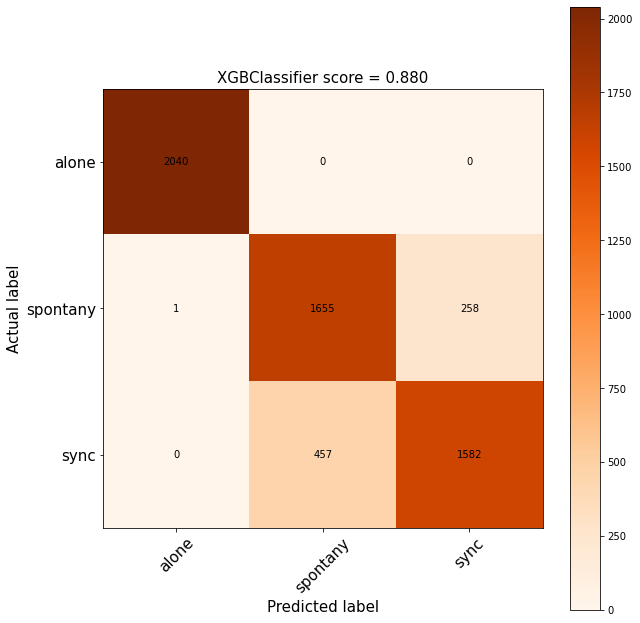

In [50]:
xgb = xgboost.XGBClassifier(use_label_encoder=False)
model_val_score(xgb)

#### Random Forest:

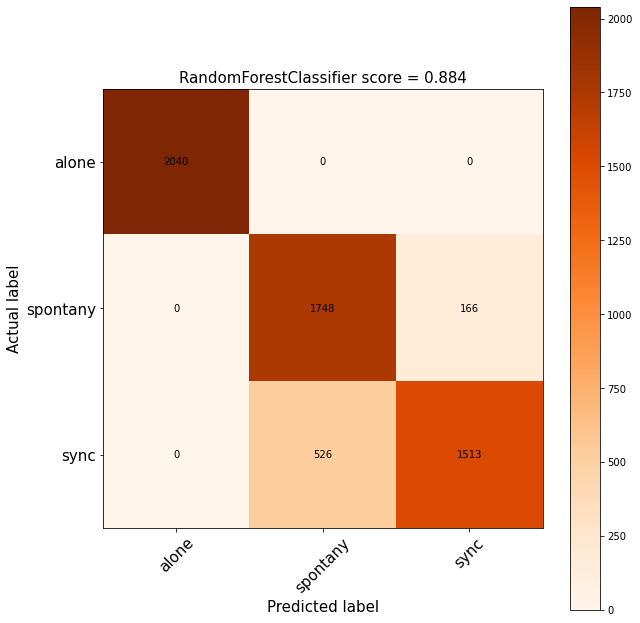

In [51]:
rf = RandomForestClassifier()
model_val_score(rf)

#### Logistic Regression:

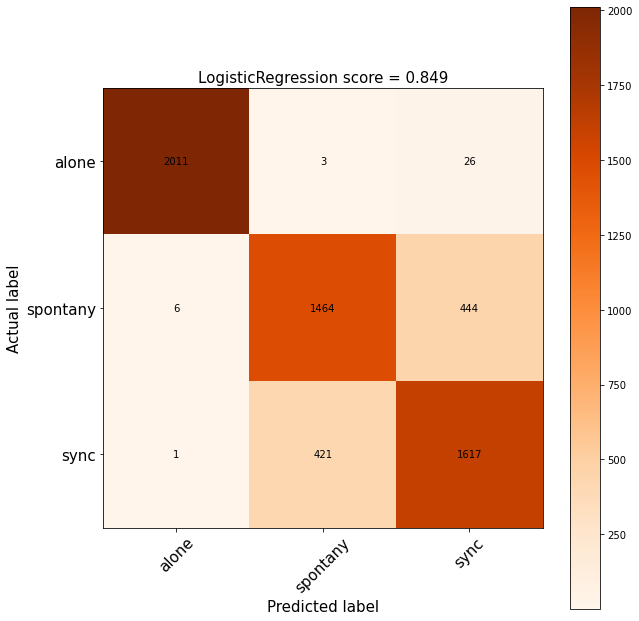

In [52]:
log_reg = LogisticRegression(random_state=15, max_iter=10000)
model_val_score(log_reg)

#### linear svm:

C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


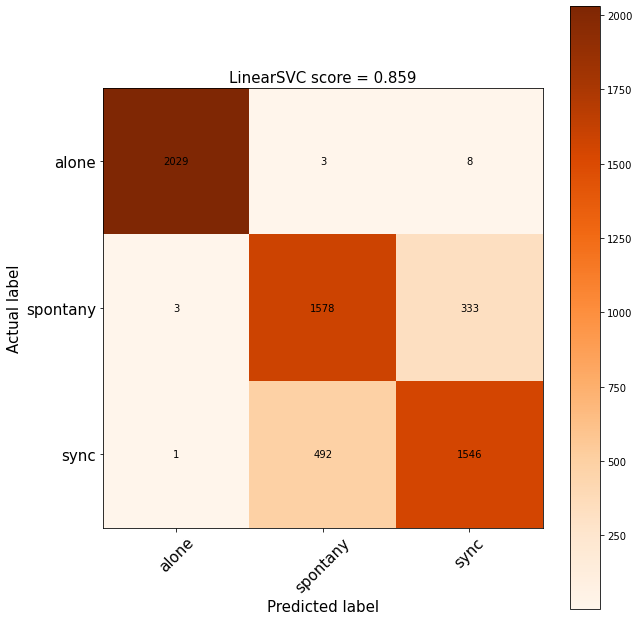

In [53]:
LSVC = LinearSVC(random_state=6, C=1, tol=1e-5, loss="hinge", max_iter=300000)
model_val_score(LSVC)

#### knn:

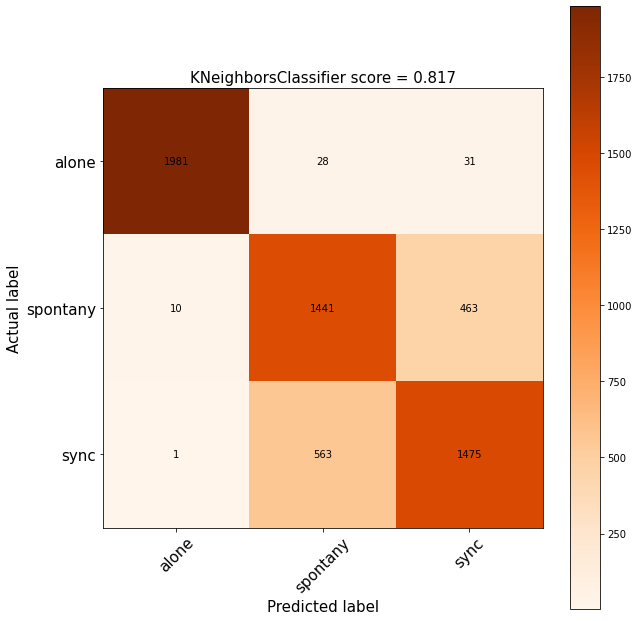

In [48]:
knn = KNeighborsClassifier(n_neighbors=100)
model_val_score(knn)

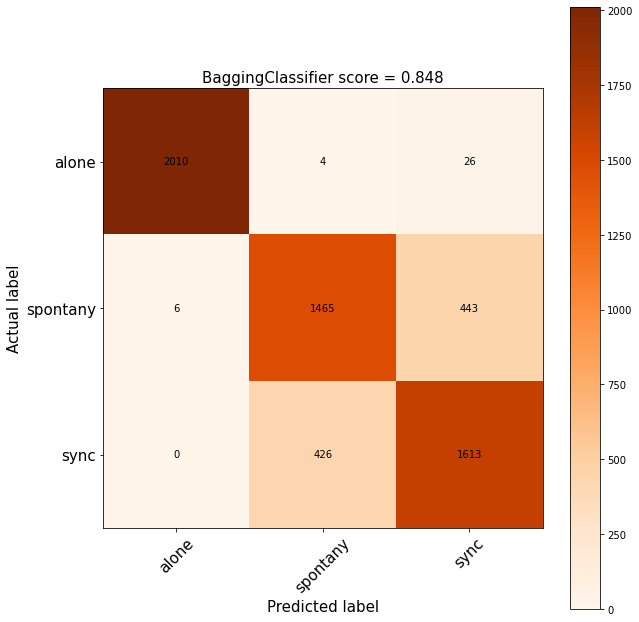

In [49]:
bag_log_reg = BaggingClassifier(
    LogisticRegression(random_state=15, max_iter=10000), bootstrap=True, n_estimators=20)

model_val_score(bag_log_reg)

C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

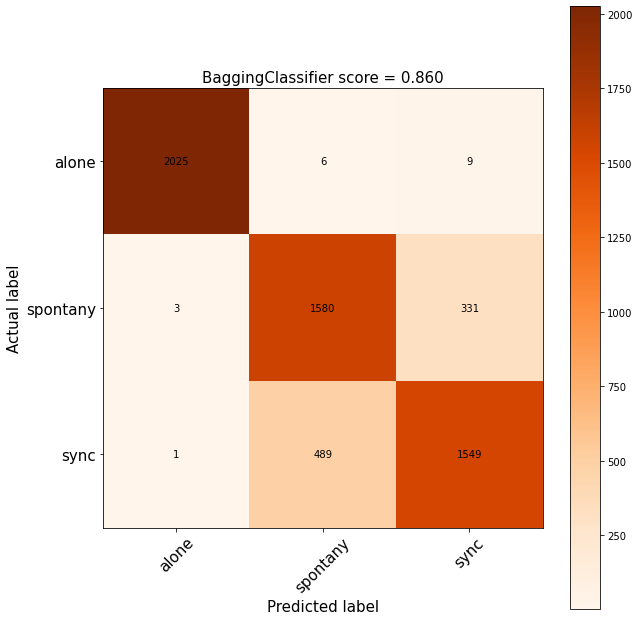

In [51]:
bag_svm = BaggingClassifier(
    LinearSVC(random_state=6, C=1, tol=1e-3, loss="hinge", max_iter=300000), bootstrap=True , n_estimators=20)

model_val_score(bag_svm)

C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\idank\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

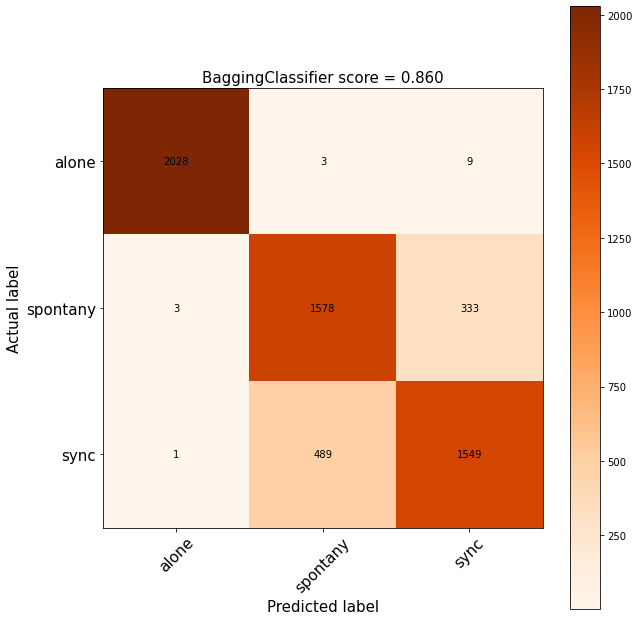

In [52]:
bag_XGB = BaggingClassifier(
    xgboost.XGBClassifier(use_label_encoder=False, eta=0.05), bootstrap=True , n_estimators=20)

model_val_score(bag_svm)

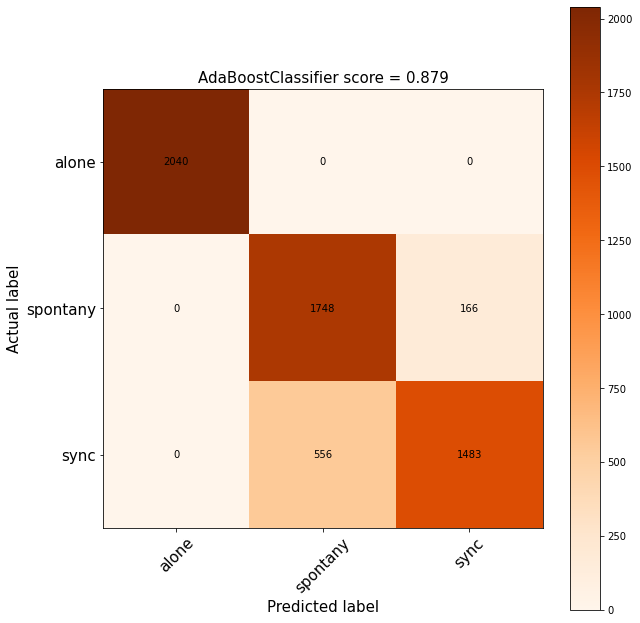

In [53]:
ada_RFC = AdaBoostClassifier(RandomForestClassifier(), n_estimators=20, learning_rate=0.1)

model_val_score(ada_RFC)

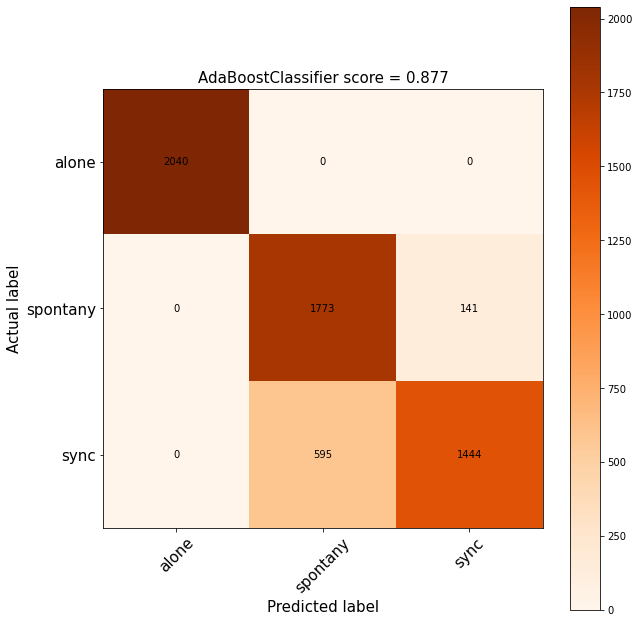

In [54]:
ada_RFC = AdaBoostClassifier(RandomForestClassifier(), n_estimators=20, learning_rate=0.3)

model_val_score(ada_RFC)

### PCA Dimensionality Reductioin
- from 69 features to 30
- 99% of the information remains

In [76]:
pca = PCA()
pca.fit(train_X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

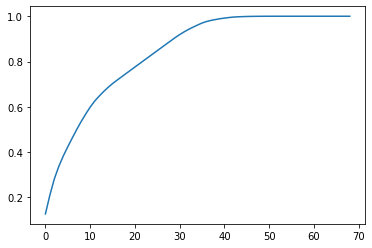

In [77]:
# the elbow is around 0.9 explaind varince, so this is a good point to use.
plt.plot(cumsum)

In [95]:
pca = PCA(n_components= 0.99)
pca.fit(train_X_scaled)
X_train_pca = pca.transform(train_X_scaled)
X_val_pca = pca.transform(val_X_scaled)
X_test_pca = pca.transform(test_X_scaled)

In [103]:
print("from 69 features we have now only " + str(len(X_train_pca[0])) + " features which remains 0.99 from the information (variance) of the original data!")

from 69 features we have now only 30 features which remains 0.99 from the information (variance) of the original data!


PCA of 99% :
[23:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
PCA of 99% :


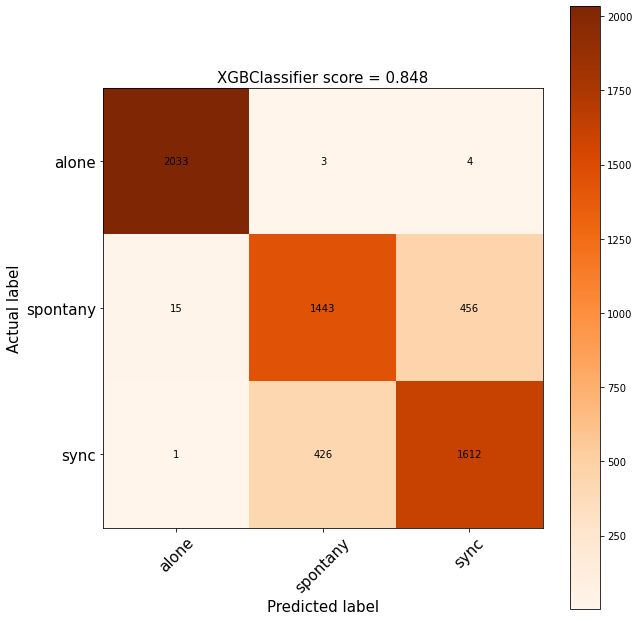

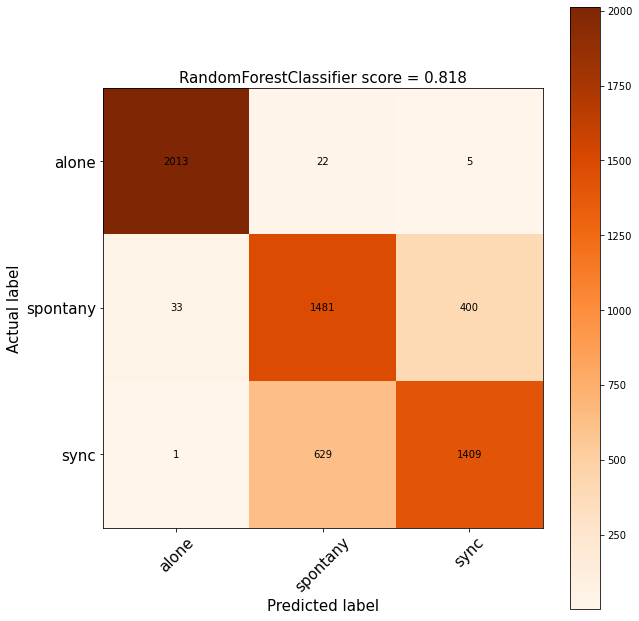

In [99]:
#### Xgboost:
print("PCA of 99% :")
xgb = xgboost.XGBClassifier(use_label_encoder=False)
model_val_score(xgb, X=X_train_pca, X_val=X_val_pca)

#### Random Forest:
print("PCA of 99% :")
rf = RandomForestClassifier()
model_val_score(rf, X=X_train_pca, X_val=X_val_pca)

In [100]:
pca = PCA(n_components= 0.9)
pca.fit(train_X_scaled)
X_train_pca = pca.transform(train_X_scaled)
X_val_pca = pca.transform(val_X_scaled)
X_test_pca = pca.transform(test_X_scaled)

In [101]:
print("from 69 features we have now only " + str(len(X_train_pca[0])) + " features which remains 0.90 from the information (variance) of the original data!")

from 69 features we have now only 30 features which remains 0.90 from the information (variance) of the original data!


PCA of 90% :
[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
PCA of 90% :


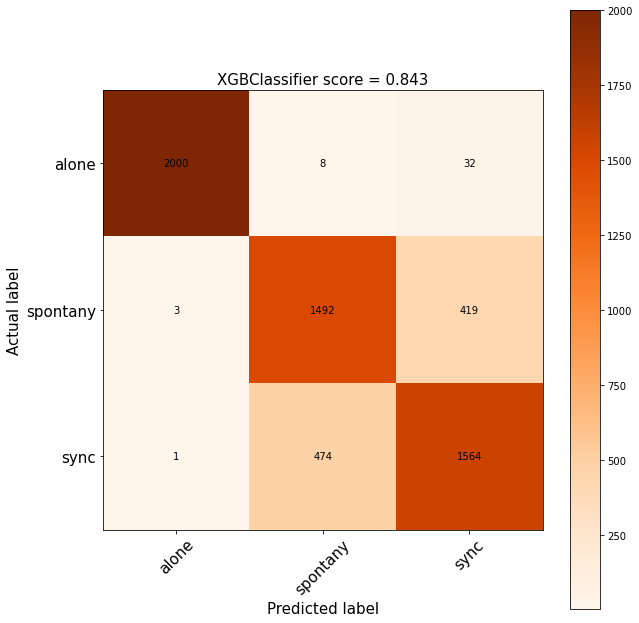

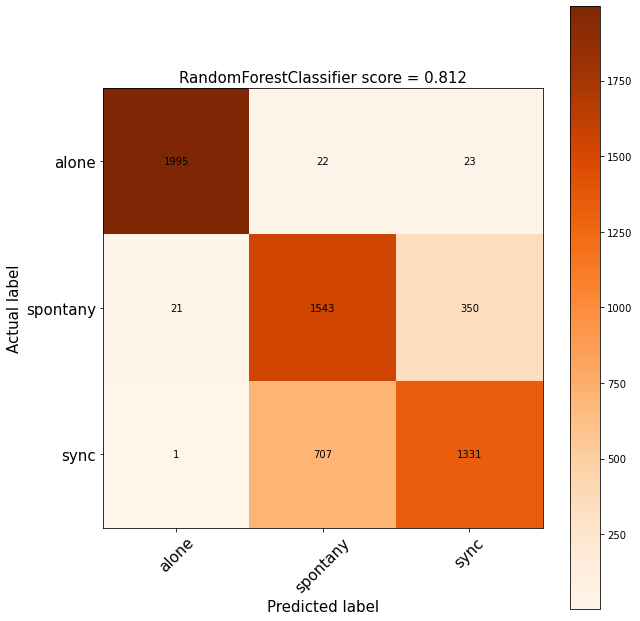

In [102]:
#### Xgboost:
print("PCA of 90% :")
xgb = xgboost.XGBClassifier(use_label_encoder=False)
model_val_score(xgb, X=X_train_pca, X_val=X_val_pca)

#### Random Forest:
print("PCA of 90% :")
rf = RandomForestClassifier()
model_val_score(rf, X=X_train_pca, X_val=X_val_pca)

# 99% PCA and 90% PCA have almost the features numbers.
## so, I will preffer PCA of 99% for FINAL TEST, of course.

#### but first, I will make a hole train data, comining the data I used for validation during the proccess.

In [126]:
X_train = pd.concat([train_data_X, val_data_X], ignore_index=True)
Y_train = pd.concat([train_data_y, val_data_y], ignore_index=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(test_data_X)
Y_test = test_data_y

# FINAL TEST!!!

# I will use with the FINAL TEST DATA for testing my best models - with pca of 99% and without pca at all.

Xgboost without PCA :
[00:53:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest without PCA :


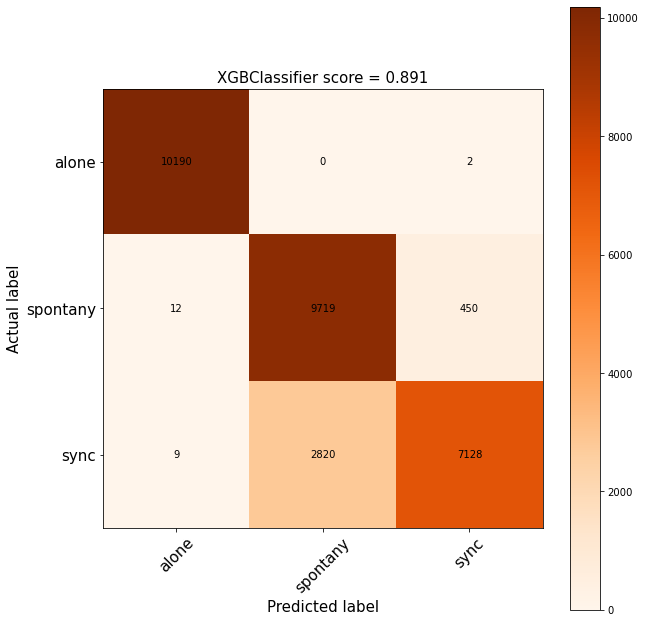

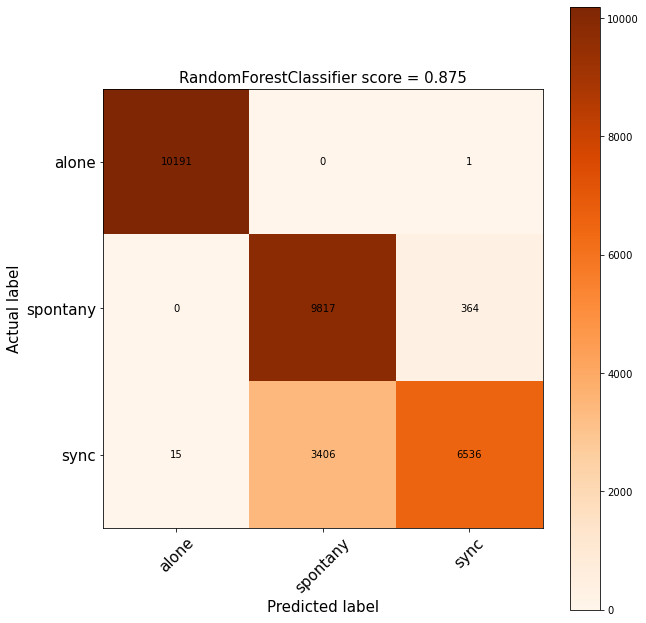

In [129]:
#### Xgboost:
print("Xgboost without PCA :")
xgb = xgboost.XGBClassifier(use_label_encoder=False)
model_val_score(xgb, X=X_train, X_val=X_test, Y=Y_train, Y_val=Y_test)

#### Random Forest:
print("Random Forest without PCA :")
rf = RandomForestClassifier()
model_val_score(rf, X=X_train, X_val=X_test, Y=Y_train, Y_val=Y_test)

Xgboost with PCA of 99% :
[00:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest with PCA of 99% :


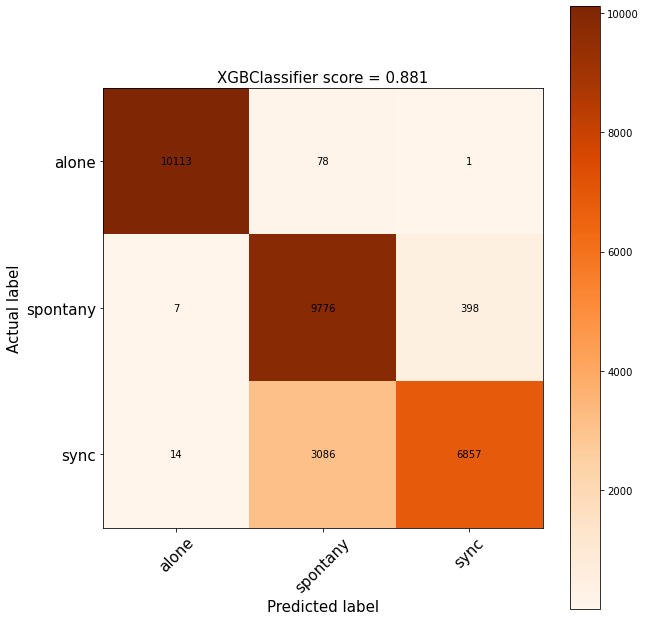

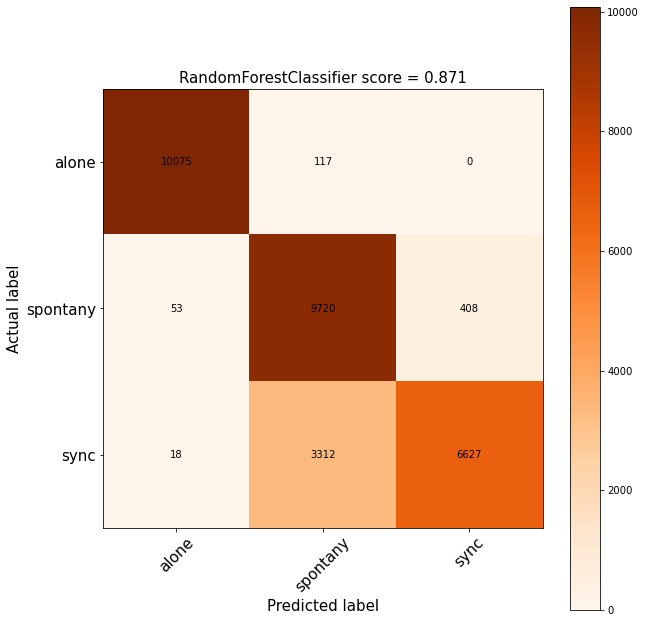

In [130]:
# test with PCA of 99%:
pca = PCA(n_components= 0.99)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Xgboost:
print("Xgboost with PCA of 99% :")
xgb = xgboost.XGBClassifier(use_label_encoder=False)
model_val_score(xgb, X=X_train_pca, X_val=X_test_pca, Y=Y_train, Y_val=Y_test)

#### Random Forest:
print("Random Forest with PCA of 99% :")
rf = RandomForestClassifier()
model_val_score(rf, X=X_train_pca, X_val=X_test_pca, Y=Y_train, Y_val=Y_test)

# Best score is 0.89!
# Best score with pca (which reduce the features about half)  is 0.88!

### what did I do?
- a lot work of preproccessing.
- new features to get the most from the data.
- scaling
- a lot of models checl
- ensemble methods (voting, stacking and more)
- adaboost and exgboost

# NOTE: there is a major problem with the data:
### - using " # hands " feature let you know exactly who is 'alone'.
### - although I removed this feture, using the "Right Hand" for all the alone (as required) make al those instance to have similar properties so it is revealing most of the 'alone' instances.
### If we look just the 'sync' and 'spontany' classes, the score is: 
###                      (9719+7128) / (9719+7128+450+2820) = 0.837